In [4]:
import numpy as np
import pandas as pd

In [5]:
dataset=pd.read_csv('C:\\Users\\HP\\Downloads\\SMSSpamCollection.csv',names=['Class','Message'])

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5575 non-null   object
 1   Message  5575 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
dataset.describe()

,Class,Message
count,5575,5575
unique,3,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [8]:
#This line encodes the categorical labels in the ‘Class’ column, mapping ‘ham’ to 0 and ‘spam’ to 1. 
#This transformation is essential because machine learning models require numeric inputs for both features and target variables. 
#By using map(), we efficiently convert a binary categorical variable into a numeric binary label. 
#It simplifies the classification task and ensures compatibility with scikit-learn classifiers. 
#This step also aligns with standard conventions where 1 is treated as the positive class, helping with interpretation during evaluation.

dataset['Class']=dataset['Class'].map({'ham':0,'spam':1})

In [9]:
dataset

,Class,Message
0,NaN,Message
1,0.0,"Go until jurong point, crazy.. Available only ..."
2,0.0,Ok lar... Joking wif u oni...
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
4,0.0,U dun say so early hor... U c already then say...
...,...,...
5570,1.0,This is the 2nd time we have tried 2 contact u...
5571,0.0,Will ü b going to esplanade fr home?
5572,0.0,"Pity, * was in mood for that. So...any other s..."
5573,0.0,The guy did some bitching but I acted like i'd...


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

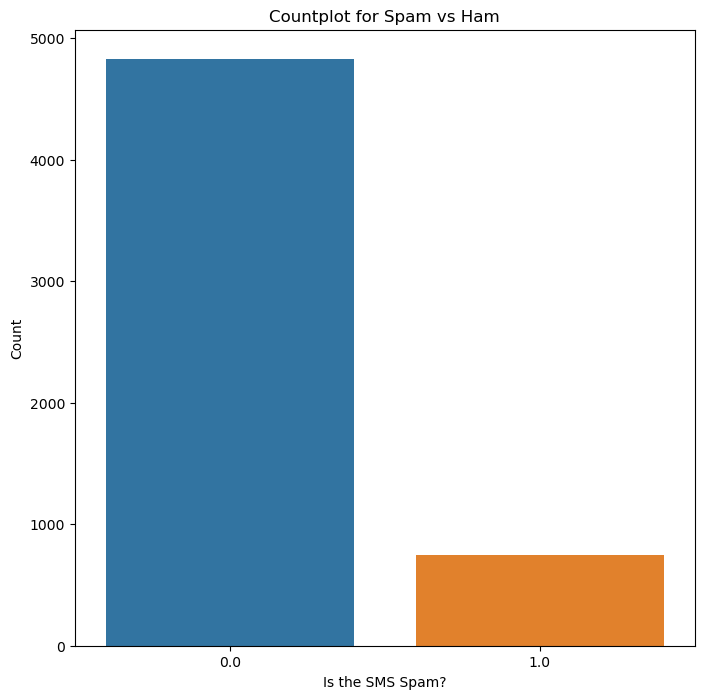

In [11]:
plt.figure(figsize=(8,8))
g=sns.countplot(x="Class", data=dataset)
plt.title('Countplot for Spam vs Ham')
plt.xlabel('Is the SMS Spam?')
plt.ylabel('Count')

In [12]:
#This line filters the original dataset to extract only those rows where the label is spam (i.e., where the 'Class' is 1). 
#It helps in isolating spam messages for targeted analysis, such as understanding common patterns, preprocessing steps specific to spam,
#or visualizing frequent spam-related terms.
#Filtering by class like this is a crucial part of binary classification workflows, especially when class imbalance or interpretability is a concern.

only_spam=dataset[dataset['Class']==1]

In [13]:
only_spam

,Class,Message
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
6,1.0,FreeMsg Hey there darling it's been 3 week's n...
9,1.0,WINNER!! As a valued network customer you have...
10,1.0,Had your mobile 11 months or more? U R entitle...
12,1.0,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5540,1.0,Want explicit SEX in 30 secs? Ring 02073162414...
5543,1.0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5550,1.0,Had your contract mobile 11 Mnths? Latest Moto...
5569,1.0,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
print('No. of Spam SMS: ', len(only_spam))
print('No. of Ham SMS: ', len(dataset)-len(only_spam))

No. of Spam SMS:  747
No. of Ham SMS:  4828


In [15]:
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [16]:
count

6

In [17]:
#This loop duplicates the spam samples multiple times and appends them to the original dataset to address class imbalance. 
#This technique, known as oversampling, increases the representation of the minority class — spam — so the model doesn’t become 
#biased toward predicting only the majority class, ham. While this form of oversampling (via duplication) 
#is simple and helps balance the dataset quickly, it may lead to overfitting. 
#In practice, more advanced techniques like SMOTE or class weighting may be used,
#but this method provides a fast and interpretable baseline for rebalancing

for i in range(0,count-1):
    dataset=pd.concat([dataset, only_spam])
dataset.shape    

(9310, 2)

Text(0, 0.5, 'Count')

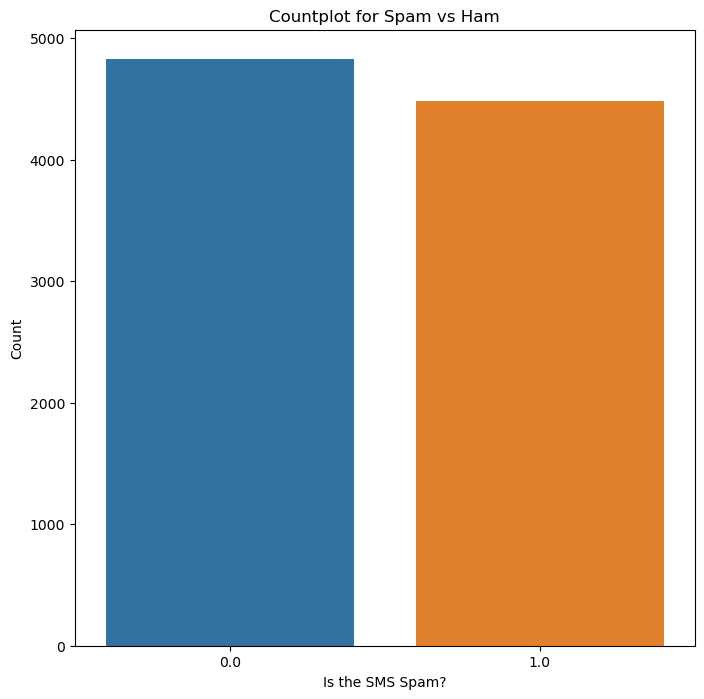

In [18]:
#This code visualizes the distribution of class labels — spam vs ham — after applying oversampling. Using Seaborn’s countplot, 
#it gives a quick visual confirmation of whether the dataset is balanced.
#This is essential to ensure that the model won’t be biased toward the majority class during training. 
#The visual format also helps in presenting the class balance clearly to stakeholders and provides confidence that the preprocessing step was effective.”

plt.figure(figsize=(8,8))
g=sns.countplot(x="Class", data=dataset)
plt.title('Countplot for Spam vs Ham')
plt.xlabel('Is the SMS Spam?')
plt.ylabel('Count')

In [19]:
#This line adds a new feature — word count — by applying a lambda function to each message. 
#It calculates the number of words by splitting the text and taking the list’s length.
#Word count is often a strong feature in text classification tasks like spam detection,
#as spam messages may have distinct length patterns compared to ham messages. 
#This feature can help in exploratory data analysis and serve as an input to machine learning models. 
#While more advanced NLP techniques exist, this method is fast, interpretable, and forms a good starting point

dataset['word_count']=dataset['Message'].apply(lambda x: len(x.split()))

In [20]:
dataset

,Class,Message,word_count
0,NaN,Message,1
1,0.0,"Go until jurong point, crazy.. Available only ...",20
2,0.0,Ok lar... Joking wif u oni...,6
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,28
4,0.0,U dun say so early hor... U c already then say...,11
...,...,...,...
5540,1.0,Want explicit SEX in 30 secs? Ring 02073162414...,16
5543,1.0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5550,1.0,Had your contract mobile 11 Mnths? Latest Moto...,28
5569,1.0,REMINDER FROM O2: To get 2.50 pounds free call...,28


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


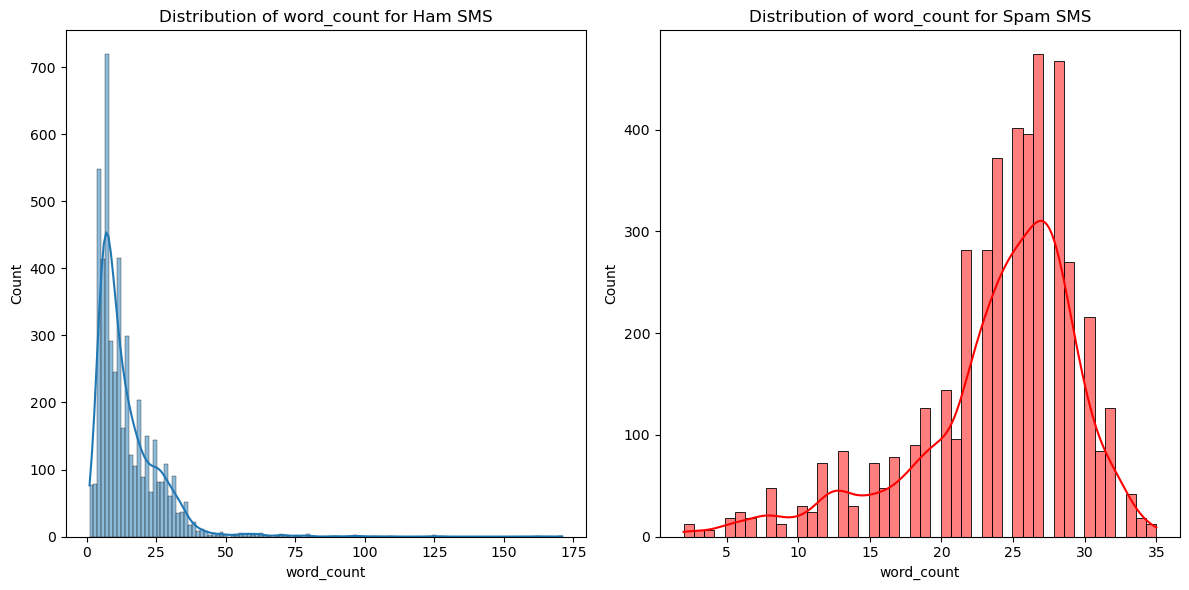

In [21]:
#This code visualizes the distribution of word counts in SMS messages, separated by class. 
#The histograms help us understand whether message length is a discriminating feature for spam detection. 
#We see two separate plots: one for ham (non-spam) and one for spam messages.
#By observing these distributions, we can infer if spam messages tend to be longer or follow a different length pattern. 
#This supports the hypothesis that message length can be a useful feature in a classification model, and helps with both EDA and feature validation.


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset['Class']==0].word_count, kde=True)
g=plt.title('Distribution of word_count for Ham SMS')
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset['Class']==1].word_count, color='red', kde=True)
p=plt.title('Distribution of word_count for Spam SMS')
plt.tight_layout()
plt.show()

In [22]:
#The currency() function scans a text message to detect the presence of any major currency symbols like $, ₹, €, etc. If found, 
#it returns 1, otherwise 0. This is a form of feature engineering that flags messages potentially related to money, prizes, or transactions — 
#all of which are common in spam. It's a lightweight but effective binary feature that enhances the predictive power of spam detection models.
#While regular expressions or NLP could be used for more advanced detection, this approach offers a great balance between simplicity and usefulness.

def currency(data):
    currency_symbols=['$','¥','€','₹','£']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0    

In [23]:
#This line applies the currency() function across all messages to create a new binary feature — contains_currency_symbols. 
#It flags whether an SMS contains symbols like $, ₹, €, etc., which are often associated with spam content such as financial scams or prize claims.
#This is a form of domain-driven feature engineering, helping the model learn context beyond raw text. 
#It’s particularly valuable in spam detection, where specific character patterns can strongly indicate class membership.

dataset['contains_currency_symbols']=dataset['Message'].apply(currency)

In [24]:
dataset

,Class,Message,word_count,contains_currency_symbols
0,NaN,Message,1,0
1,0.0,"Go until jurong point, crazy.. Available only ...",20,0
2,0.0,Ok lar... Joking wif u oni...,6,0
3,1.0,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
4,0.0,U dun say so early hor... U c already then say...,11,0
...,...,...,...,...
5540,1.0,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5543,1.0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5550,1.0,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5569,1.0,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


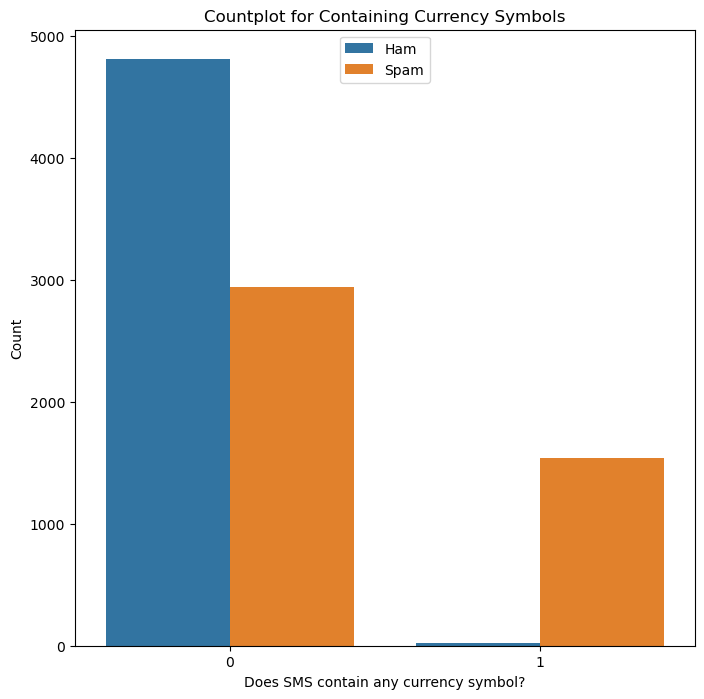

In [27]:
#This plot examines the relationship between the presence of currency symbols and the SMS class (Ham or Spam).
#We map binary class labels to readable strings and visualize counts grouped by whether a message contains any currency symbols.
#If the number of spam messages with currency symbols is significantly higher, it supports the idea that this feature is a strong spam indicator. 
#Such visualizations are crucial during feature selection to ensure that engineered variables are actually meaningful for the target classification task.


dataset['Class'] = dataset['Class'].map({0: 'Ham', 1: 'Spam'})

plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbols', data=dataset, hue='Class')
plt.title('Countplot for Containing Currency Symbols')
plt.xlabel('Does SMS contain any currency symbol?')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'], loc='upper center')


In [ ]:
#This function scans each message to check whether it contains any numeric digit.
#Since spam messages often contain numbers — such as prize amounts, phone numbers, or promo codes —
# the presence of digits can be a strong signal for spam classification. 
#The function returns 1 if any digit is found, otherwise 0, making it a simple binary feature. 
#Although ord() is used here to detect digits by ASCII values, Python's built-in str.isdigit() would be a more readable and idiomatic alternative.

def number(data):
    for i in data:
        if(ord(i)>=48 and ord(i)<=57):
            return 1
    return 0

In [ ]:
#This line applies the number() function to check whether each SMS message contains any numeric digits and
#creates a new binary feature called contains_number.
#Since many spam messages include phone numbers, prize amounts, or promo codes, the presence of digits can be a strong spam indicator.
#This feature helps the model capture a simple but meaningful signal that complements traditional text-based features.

dataset['contains_number']=dataset['Message'].apply(number)

In [ ]:
dataset

In [ ]:
#This plot visualizes how the presence of numeric digits in SMS messages varies between spam and ham messages. 
#By grouping on the binary feature contains_number and using hue for class labels, 
#we can clearly observe whether spam messages are more likely to include numbers.
#This helps validate our hypothesis and demonstrates that contains_number is a meaningful predictive feature. 
#Visual validation like this is crucial in the feature engineering pipeline before model training.

plt.figure(figsize=(8,8))
g=sns.countplot(x='contains_number', data=dataset, hue='Class')
plt.title('Countplot for containig numbers')
plt.xlabel('Does SMS contain any number?')
plt.ylabel('count')
plt.legend(labels=['Ham','Spam'],loc=9)

In [ ]:
import nltk
import re 
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
#This block processes raw SMS messages into a clean, standardized format suitable for vectorization and machine learning.
#It removes non-alphabetic characters, lowercases text, eliminates stopwords, and lemmatizes words to their base form.
#These steps reduce noise, unify vocabulary, and help the model generalize better. 
#The resulting ‘corpus’ is a list of cleaned messages that can be passed into vectorizers like TF-IDF for feature extraction. 
#This preprocessing pipeline is essential for transforming unstructured text into meaningful numerical features.

corpus=[]
wnl=WordNetLemmatizer()
for sms in list(dataset.Message):
    Message=re.sub(pattern='[^a-zA-z]',repl=' ',string=sms)
    Message=Message.lower()
    words=Message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    Message=' '.join(lemm_words)
    corpus.append(Message)

In [ ]:
corpus

In [ ]:
#We use TfidfVectorizer to convert preprocessed SMS messages into numerical vectors
#that reflect how important each word is in a message relative to the entire dataset.
#By setting max_features=500, we retain only the most informative terms, improving both model performance and training speed. 
#The resulting matrix is then used as input for our machine learning models.
#TF-IDF is effective in text classification problems like spam detection because it emphasizes distinctive words while downplaying common ones.

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names_out()

In [ ]:
#This step separates our dataset into the features (X) and the target (y). 
#The features are built from the TF-IDF representation of SMS messages, allowing us to use statistical weights for each word.
#We convert this into a Pandas DataFrame for better readability and compatibility with scikit-learn. 
#The target variable is the class label indicating whether a message is spam or not.
#This structure is essential for training and evaluating classification models.

X=pd.DataFrame(vectors, columns=feature_names)
y=dataset['Class']

In [ ]:
#These imports set up the tools for model evaluation and validation. train_test_split ensures that we can evaluate our model on unseen data,
#which helps prevent overfitting. cross_val_score provides a more robust performance estimate by testing across multiple folds of the dataset. 
#For model performance metrics, confusion_matrix and classification_report help quantify how well our model distinguishes between
#spam and ham messages in terms of precision, recall, and overall accuracy.

from sklearn.model_selection import  cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#This line splits the dataset into training and testing subsets using an 80-20 split. 
#It ensures that the model learns patterns from the training data and is evaluated fairly on unseen data from the test set. 
#Setting random_state=42 guarantees consistent results across runs.
#This is a standard and essential practice in machine learning to assess a model’s ability to generalize.

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test

In [ ]:
#We train a Multinomial Naive Bayes classifier on TF-IDF vectorized text data,
#which is particularly suited for handling frequency-based features in spam detection. 
#To ensure robust performance evaluation, we apply 10-fold cross-validation using the F1-score, which balances precision and recall. 
#This setup allows us to estimate how well the model will generalize to new, unseen messages,
#while the standard deviation tells us about the model’s consistency across different data splits.

y = y.dropna()
X = X.loc[y.index]
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
cv=cross_val_score(mnb, X, y, scoring='f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

In [ ]:
#Here, we train the Multinomial Naive Bayes model on our TF-IDF feature matrix using the training dataset.
#This model estimates the likelihood of each word occurring in spam vs. ham messages and applies Bayes' theorem to make predictions. 
#Once trained, we use it to predict labels for the test set. 
#This helps us evaluate the model's generalization capability on unseen data — which is crucial for real-world applications
#like detecting spam in new SMS messages.

mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)

In [ ]:
#Here, we evaluate the model’s predictions against the true test labels using the classification_report from scikit-learn. 
#We ensure that the test labels are clean and that predictions are aligned in length. 
#The report gives us precision, recall, and F1-score for both spam and ham messages,
#which are critical in applications like spam filtering where both false positives and false negatives can be problematic. 
#The F1-score, in particular, provides a balanced measure of the model’s ability to correctly classify messages.

y_test = y_test.dropna()
y_pred = y_pred[:len(y_test.index)]
print(classification_report(y_test, y_pred))

In [ ]:
#This confusion matrix breaks down the actual vs. predicted classifications into true positives, false positives, true negatives, and false negatives.
#In the context of spam detection, this lets us clearly see how many spam messages were missed (false negatives)
#or how many legitimate messages were incorrectly flagged (false positives). 
#This matrix is a great diagnostic tool to fine-tune thresholds or choose models that better align with the business priority — 
#whether that's minimizing spam leakage or avoiding false alarms.

cm=confusion_matrix(y_test, y_pred)
cm

In [ ]:
#This heatmap visually represents the confusion matrix for the Multinomial Naive Bayes classifier.
#The diagonal elements show the number of correctly predicted spam and ham messages,
#while the off-diagonal elements reveal the types of misclassifications. 
#This helps assess whether the model is more prone to false positives or false negatives,
#which is crucial in use cases like spam filtering where different types of errors have different impacts. 
#The color gradient further emphasizes the count intensity, making this a highly intuitive evaluation tool.

plt.figure(figsize=(8,8))
axis_labels=['ham', 'spam']
g=sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={'shrink':0.5}, cmap='Blues')
plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [ ]:
#Here, we evaluate a Decision Tree classifier using 10-fold cross-validation and the F1-score as our metric. 
#Decision Trees are intuitive and interpretable models, but in high-dimensional, sparse datasets like TF-IDF vectors from SMS messages, 
#they tend to overfit unless regularized. The cross-validation gives us a robust estimate of its generalization performance. 
#We print both the average and the variability (standard deviation) of the F1-score to understand model reliability.

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1=cross_val_score(dt, X, y, scoring='f1', cv=10)
print(round(cv1.mean(), 3))
print(round(cv1.std(), 3))

In [ ]:
#We train the Decision Tree classifier on TF-IDF-transformed SMS data to learn splitting rules that classify messages as spam or ham. 
#Once trained, we predict the labels of the test set. Although Decision Trees offer interpretability, 
#they often overfit in high-dimensional sparse text data unless regularized.
#Still, it’s a useful benchmark to compare against other models like Naive Bayes or Logistic Regression.

dt.fit(X_train, y_train)
y_pred1=dt.predict(X_test)

In [ ]:
#We first ensure that the prediction and ground truth arrays are aligned in length, which is essential before computing performance metrics.
#We then use the classification report to get a detailed evaluation of our Decision Tree model in terms of precision, recall, and F1-score. 
#These metrics help us understand how effectively the model distinguishes spam from ham,
#especially in handling false positives and false negatives — both of which have significant impact in spam detection systems.

if len(y_test) != len(y_pred1):
    print("Resizing y_pred1 to match the length of y_test.")
    y_pred1 = y_pred1[:len(y_test)]
print(classification_report(y_test, y_pred1))

In [ ]:
#This confusion matrix allows us to assess the model's performance beyond aggregate metrics.
#In spam detection, false positives result in legitimate messages being marked as spam, which frustrates users,
#while false negatives allow spam to slip through. By examining true positives, false positives, false negatives, and true negatives,
#we can decide whether our model is leaning toward over-caution or under-detection — and accordingly adjust thresholds or try other models.

cm=confusion_matrix(y_test, y_pred1)
cm

In [ ]:
#This heatmap visualizes the confusion matrix for our classifier, showing how often the model correctly or incorrectly classifies spam and ham messages.
#The diagonal elements reflect correct predictions, while off-diagonal elements indicate misclassifications.
#Using a visual format like this enhances interpretability and highlights specific areas of model weakness,
#such as whether the model is overly cautious or overly lenient in labeling spam.

plt.figure(figsize=(8,8))
axis_labels=['ham', 'spam']
g=sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={'shrink':0.5}, cmap='Blues')
plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [ ]:
#This heatmap displays the confusion matrix, allowing us to see how well the model distinguishes between spam and ham. 
#The diagonal shows correct predictions, while off-diagonal entries highlight misclassifications.
#Visualizing the matrix helps detect if the model is being too aggressive in flagging spam or too lenient in letting it through — 
#critical in applications like spam filtering. 
#This format is not only insightful but also highly presentable, making it ideal for both analysis and communication.

def predict_spam(sms):
    Message=re.sub(pattern='[^a-zA-Z]',repl=' ', string=sms)
    Message=Message.lower()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    Message=' '.join(lemm_words)
    temp=tfidf.transform([Message]).toarray()
    return dt.predict(temp)

In [ ]:
#This code checks how the model performs on a real-world style message. 
#It passes the text through the same preprocessing and vectorization pipeline used during training,
#and then makes a prediction using the trained classifier. 
#This kind of manual test is helpful for validating if the model generalizes well and catches typical spam patterns — such as use of compensation offers,
#financial terms, or currency symbols.

sample_message='IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. '
if predict_spam(sample_message):
    print('Gotcha! This is a spam message')
else: 
    print('This is a HAM (normal) message')